In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
import awkward as ak
import scipy
import ROOT
sys.path.insert(0,"../")

from ROOT import gStyle
gStyle.SetOptStat(0)


Welcome to JupyROOT 6.30/07


In [2]:
sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import ABCD_FirstStudy_Helper
import Processing_Helpers
import analysis_helpers


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [3]:
root_colors = [ROOT.kBlack, ROOT.kRed, ROOT.kBlue, ROOT.kViolet,  ROOT.kBlue-4,  ROOT.kRed-4, ROOT.kRed+4, ROOT.kCyan, ROOT.kGreen-4, ROOT.kCyan+4, ]

In [4]:
### NOTE: for this sample in data, the tau energy branch is messed up ###
data_path_base = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data_allChannels/"

data_samples = ["Muon0-Run2024B-PromptReco-v1",
    "Muon0-Run2024C-PromptReco-v1",
    "Muon0-Run2024D-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v2",
    "Muon0-Run2024F-PromptReco-v1",
    "Muon0-Run2024G-PromptReco-v1",
    "Muon0-Run2024H-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v2",
    "Muon1-Run2024B-PromptReco-v1",
    "Muon1-Run2024C-PromptReco-v1",
    "Muon1-Run2024D-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v2",
    "Muon1-Run2024F-PromptReco-v1",
    "Muon1-Run2024G-PromptReco-v1",
    "Muon1-Run2024H-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v2"
    ]

data_events_list = [data_path_base+sample+"/normalized/"+sample+"_goodLumi.root" for sample in data_samples]
data_events  = MuonSystemReader.loadTree_nanoFactory(data_events_list)



/uscms/home/amalbert/.local/lib/python3.9/site-packages/dask_awkward/lib/structure.py:911: UserWarning: Please ensure that dask.awkward<nCscRechitClusters, npartitions=20>
        is partitionwise-compatible with dask.awkward<getitem, npartitions=20>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


In [9]:
importlib.reload(MuonSystemReader)
importlib.reload(ABCD_FirstStudy_Helper)
#importlib.reload(Processing_Helpers)

<module 'ABCD_FirstStudy_Helper' from '/uscms_data/d3/amalbert/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/HNL_Plotting_Scripts/../python/HNL_Plotting_HelperFunctions/ABCD_FirstStudy_Helper.py'>

In [ ]:
#load station veto data
clusterSize_allCuts_StationVeto, dPhi_allCuts_StationVeto = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelections(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

In [6]:
#load DNN data
clusterSize_allCutsDNN, dPhi_allCutsDNN = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, DNN_cut=0.99975)
#clusterSize_allCutsDNNMT, dPhi_allCutsDNNMT = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(data_events, passID = 'tauIsMedium', failID = 'tauIsTight', blind=False, DNN_cut=0.99975)

/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

### cluster size distribution for different dPhi slices - station veto

[0, 1, 2, 2.6, 3.2]
[(0, 1), (1, 2), (2, 2.6), (2.6, 3.2)]


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


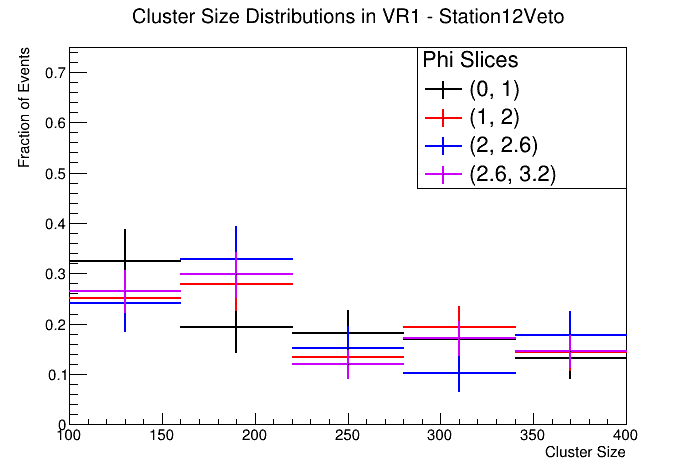

In [98]:
dPhi_bin_array = [0,1,2,2.6,3.2]
dPhi_bin_ranges = [(round(dPhi_bin_array[i],2), round(dPhi_bin_array[i+1],2)) for i in range(len(dPhi_bin_array)-1)]

print(dPhi_bin_array)
print(dPhi_bin_ranges)

c = ROOT.TCanvas()
leg =  ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
hists, legs = [], []
for idx, bin_tuple in enumerate(dPhi_bin_ranges):
    masked_events = clusterSize_allCuts_StationVeto[(dPhi_allCuts_StationVeto>=bin_tuple[0]) & (dPhi_allCuts_StationVeto<bin_tuple[1])]
    tmp_hist = analysis_helpers.get_ROOT_hist_from_ak(masked_events, xlow=100, xhigh=400, nbins=5)
    hists.append(tmp_hist)
    legs.append(f"{bin_tuple}")
    


for idx, (hist, label) in enumerate(zip(hists, legs)):
    hist.SetLineColor(root_colors[idx])
    hist.SetLineWidth(2)
    hist.Scale(1/hist.GetSumOfWeights())
    hist.GetYaxis().SetRangeUser(0, 0.75)
    if idx==0:
        hist.SetTitle("Cluster Size Distributions in VR1 - Station12Veto;Cluster Size;Fraction of Events")
        hist.Draw()
    else:
        hist.Draw("SAME")
    leg.AddEntry(hist, label, "lep")    

leg.SetHeader("Phi Slices")
leg.Draw("SAME")
c.Draw()

### cluster size distribution for different dPhi slices - DNN

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


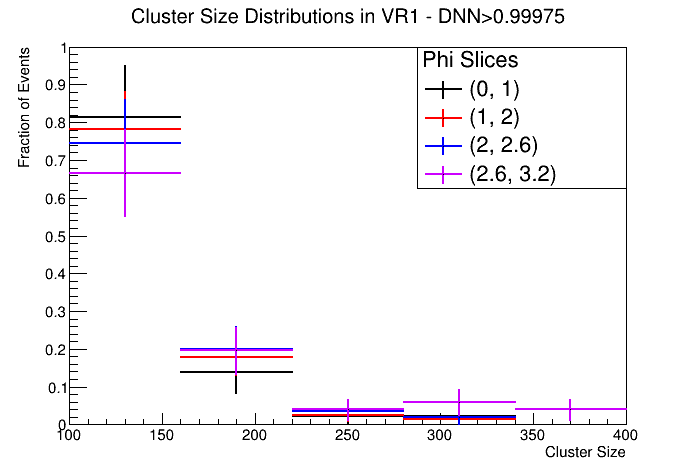

In [82]:
dPhi_bin_array = [0,1,2,2.6,3.2]
dPhi_bin_ranges = [(round(dPhi_bin_array[i],2), round(dPhi_bin_array[i+1],2)) for i in range(len(dPhi_bin_array)-1)]

c = ROOT.TCanvas()
leg =  ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
hists, legs = [], []
for idx, bin_tuple in enumerate(dPhi_bin_ranges):
    masked_events = clusterSize_allCutsDNN[(dPhi_allCutsDNN>=bin_tuple[0]) & (dPhi_allCutsDNN<bin_tuple[1])]
    tmp_hist = analysis_helpers.get_ROOT_hist_from_ak(masked_events, xlow=100, xhigh=400, nbins=5)
    hists.append(tmp_hist)
    legs.append(f"{bin_tuple}")
    


for idx, (hist, label) in enumerate(zip(hists, legs)):
    hist.SetLineColor(root_colors[idx])
    hist.SetLineWidth(2)
    hist.Scale(1/hist.GetSumOfWeights())
    hist.GetYaxis().SetRangeUser(0, 1)
    if idx==0:
        hist.SetTitle("Cluster Size Distributions in VR1 - DNN>0.99975;Cluster Size;Fraction of Events")
        hist.Draw()
    else:
        hist.Draw("SAME")
    leg.AddEntry(hist, label, "lep")    

leg.SetHeader("Phi Slices")
leg.Draw("SAME")
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


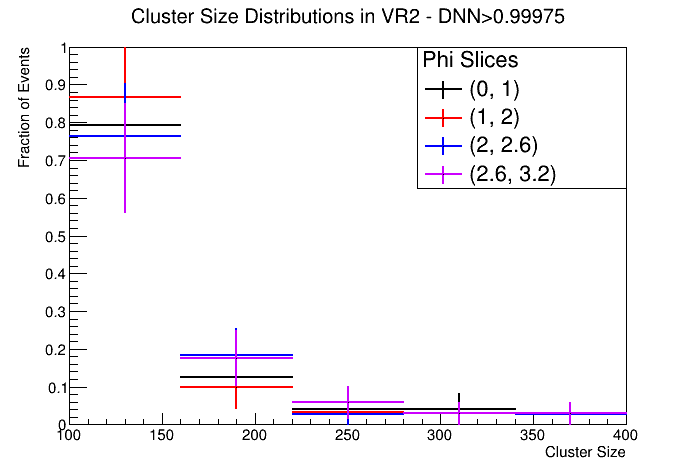

In [100]:
dPhi_bin_array = [0,1,2,2.6,3.2]
dPhi_bin_ranges = [(round(dPhi_bin_array[i],2), round(dPhi_bin_array[i+1],2)) for i in range(len(dPhi_bin_array)-1)]

c = ROOT.TCanvas()
leg =  ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
hists, legs = [], []
for idx, bin_tuple in enumerate(dPhi_bin_ranges):
    masked_events = clusterSize_allCutsDNNMT[(dPhi_allCutsDNNMT>=bin_tuple[0]) & (dPhi_allCutsDNNMT<bin_tuple[1])]
    tmp_hist = analysis_helpers.get_ROOT_hist_from_ak(masked_events, xlow=100, xhigh=400, nbins=5)
    hists.append(tmp_hist)
    legs.append(f"{bin_tuple}")
    


for idx, (hist, label) in enumerate(zip(hists, legs)):
    hist.SetLineColor(root_colors[idx])
    hist.SetLineWidth(2)
    hist.Scale(1/hist.GetSumOfWeights())
    hist.GetYaxis().SetRangeUser(0, 1)
    if idx==0:
        hist.SetTitle("Cluster Size Distributions in VR2 - DNN>0.99975;Cluster Size;Fraction of Events")
        hist.Draw()
    else:
        hist.Draw("SAME")
    leg.AddEntry(hist, label, "lep")    

leg.SetHeader("Phi Slices")
leg.Draw("SAME")
c.Draw()

### cluster size distribution for different dPhi slices - station veto

[100, 130, 160, 220, 400]
[(100, 130), (130, 160), (160, 220), (220, 400)]


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


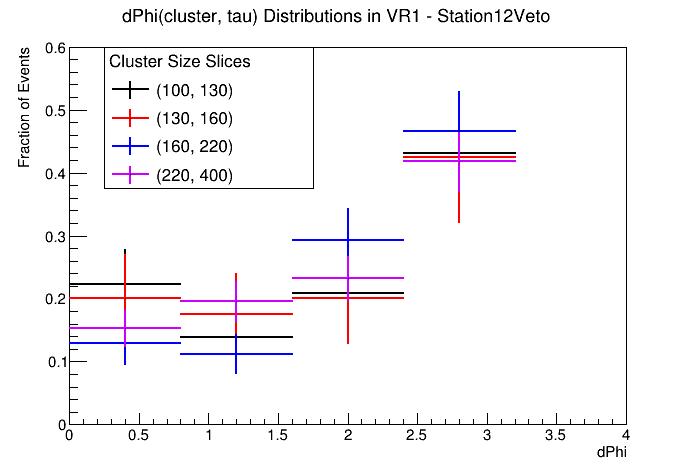

In [101]:
cluster_bin_array = [100, 130, 160, 220, 400]
cluster_bin_ranges = [(round(cluster_bin_array[i],2), round(cluster_bin_array[i+1],2)) for i in range(len(cluster_bin_array)-1)]

print(cluster_bin_array)
print(cluster_bin_ranges)

c = ROOT.TCanvas()
leg =  ROOT.TLegend(0.15, 0.6, 0.45, 0.9)
hists, legs = [], []
for idx, bin_tuple in enumerate(cluster_bin_ranges):
    masked_events = dPhi_allCuts_StationVeto[(clusterSize_allCuts_StationVeto>=bin_tuple[0]) & (clusterSize_allCuts_StationVeto<bin_tuple[1])]
    tmp_hist = analysis_helpers.get_ROOT_hist_from_ak(masked_events, xlow=0, xhigh=3.2, nbins=4)
    hists.append(tmp_hist)
    legs.append(f"{bin_tuple}")
    


for idx, (hist, label) in enumerate(zip(hists, legs)):
    hist.SetLineColor(root_colors[idx])
    hist.SetLineWidth(2)
    hist.Scale(1/hist.GetSumOfWeights())
    hist.GetYaxis().SetRangeUser(0, 0.6)
    hist.GetXaxis().SetRangeUser(0, 3.4)
    if idx==0:
        hist.SetTitle("dPhi(cluster, tau) Distributions in VR1 - Station12Veto;dPhi;Fraction of Events")
        hist.Draw()
    else:
        hist.Draw("SAME")
    leg.AddEntry(hist, label, "lep")    

leg.SetHeader("Cluster Size Slices")
leg.Draw("SAME")
c.Draw()

[100, 130, 160, 220, 400]
[(100, 130), (130, 160), (160, 220), (220, 400)]


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


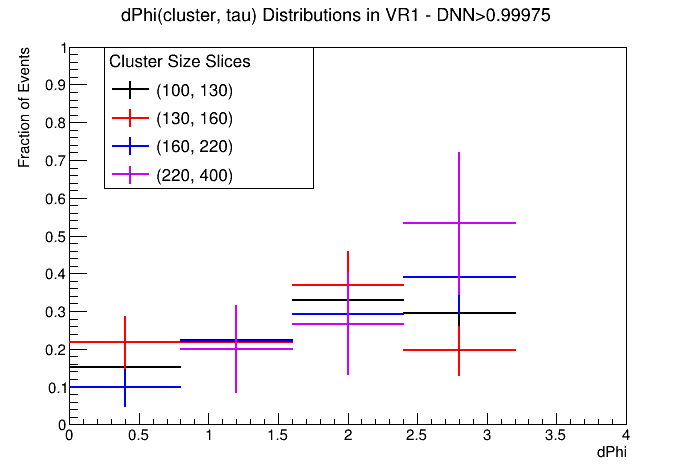

In [81]:
cluster_bin_array = [100, 130, 160, 220, 400]
cluster_bin_ranges = [(round(cluster_bin_array[i],2), round(cluster_bin_array[i+1],2)) for i in range(len(cluster_bin_array)-1)]

print(cluster_bin_array)
print(cluster_bin_ranges)

c = ROOT.TCanvas()
leg =  ROOT.TLegend(0.15, 0.6, 0.45, 0.9)
hists, legs = [], []
for idx, bin_tuple in enumerate(cluster_bin_ranges):
    masked_events = dPhi_allCutsDNN[(clusterSize_allCutsDNN>=bin_tuple[0]) & (clusterSize_allCutsDNN<bin_tuple[1])]
    tmp_hist = analysis_helpers.get_ROOT_hist_from_ak(masked_events, xlow=0, xhigh=3.2, nbins=4)
    hists.append(tmp_hist)
    legs.append(f"{bin_tuple}")
    


for idx, (hist, label) in enumerate(zip(hists, legs)):
    hist.SetLineColor(root_colors[idx])
    hist.SetLineWidth(2)
    hist.Scale(1/hist.GetSumOfWeights())
    hist.GetYaxis().SetRangeUser(0, 1)
    hist.GetXaxis().SetRangeUser(0, 3.4)
    if idx==0:
        hist.SetTitle("dPhi(cluster, tau) Distributions in VR1 - DNN>0.99975;dPhi;Fraction of Events")
        hist.Draw()
    else:
        hist.Draw("SAME")
    leg.AddEntry(hist, label, "lep")    

leg.SetHeader("Cluster Size Slices")
leg.Draw("SAME")
c.Draw()

[100, 130, 160, 220, 400]
[(100, 130), (130, 160), (160, 220), (220, 400)]


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


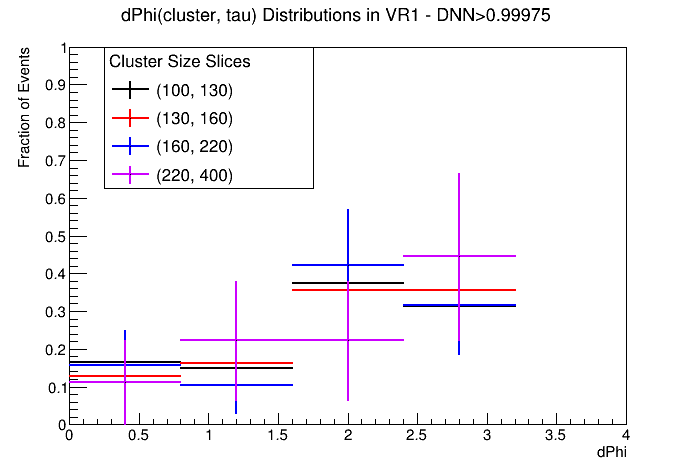

In [103]:
cluster_bin_array = [100, 130, 160, 220, 400]
cluster_bin_ranges = [(round(cluster_bin_array[i],2), round(cluster_bin_array[i+1],2)) for i in range(len(cluster_bin_array)-1)]

print(cluster_bin_array)
print(cluster_bin_ranges)

c = ROOT.TCanvas()
leg =  ROOT.TLegend(0.15, 0.6, 0.45, 0.9)
hists, legs = [], []
for idx, bin_tuple in enumerate(cluster_bin_ranges):
    masked_events = dPhi_allCutsDNNMT[(clusterSize_allCutsDNNMT>=bin_tuple[0]) & (clusterSize_allCutsDNNMT<bin_tuple[1])]
    tmp_hist = analysis_helpers.get_ROOT_hist_from_ak(masked_events, xlow=0, xhigh=3.2, nbins=4)
    hists.append(tmp_hist)
    legs.append(f"{bin_tuple}")
    


for idx, (hist, label) in enumerate(zip(hists, legs)):
    hist.SetLineColor(root_colors[idx])
    hist.SetLineWidth(2)
    hist.Scale(1/hist.GetSumOfWeights())
    hist.GetYaxis().SetRangeUser(0, 1)
    hist.GetXaxis().SetRangeUser(0, 3.4)
    if idx==0:
        hist.SetTitle("dPhi(cluster, tau) Distributions in VR1 - DNN>0.99975;dPhi;Fraction of Events")
        hist.Draw()
    else:
        hist.Draw("SAME")
    leg.AddEntry(hist, label, "lep")    

leg.SetHeader("Cluster Size Slices")
leg.Draw("SAME")
c.Draw()

### Try to investigate clusters that the DNN likes with large cluster size

In [10]:
#load DNN data
clusterEta_allCutsDNN, clusterPhi_allCutsDNN, runNum_allCutsDNN, lumiSec_allCutsDNN, evtNum_allCutsDNN, clusterDEta_allCutsDNN, clusterTime_allCutsDNN, clusterTimeSpread_allCutsDNN, clusterNStation10_allCutsDNN, dPhiMET_allCutsDNN, clusterJetVetoPt_allCutsDNN, clusterMuonVetoPt_allCutsDNN, tauPt_allCutsDNN = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(
            data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, 
            DNN_cut=0.99975, hotspotCheck=True, additional_branches=["runNum", "lumiSec", "evtNum", 'cscRechitClusterPromptTauDeltaEta','cscRechitClusterTimeWeighted','cscRechitClusterTimeSpreadWeightedAll', 'cscRechitClusterNStation10','cscRechitClusterPuppiMet_dPhi', 'cscRechitClusterJetVetoPt', 'cscRechitClusterMuonVetoPt', 'tauPt']
            )

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41671 instead
  warnings.warn(


/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])

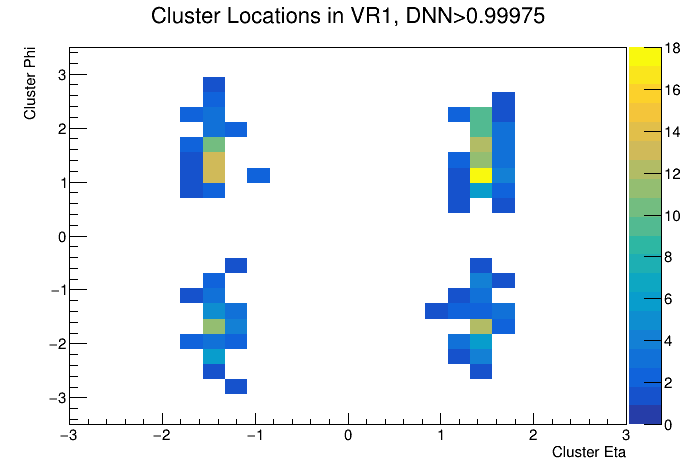

In [91]:
h2d_VR1_DNN = ROOT.TH2D("", "Cluster Locations in VR1, DNN>0.99975;Cluster Eta;Cluster Phi", 25, -3, 3, 25, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsDNN, clusterPhi_allCutsDNN):
    h2d_VR1_DNN.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN.Draw("profcolz")
c.Draw()

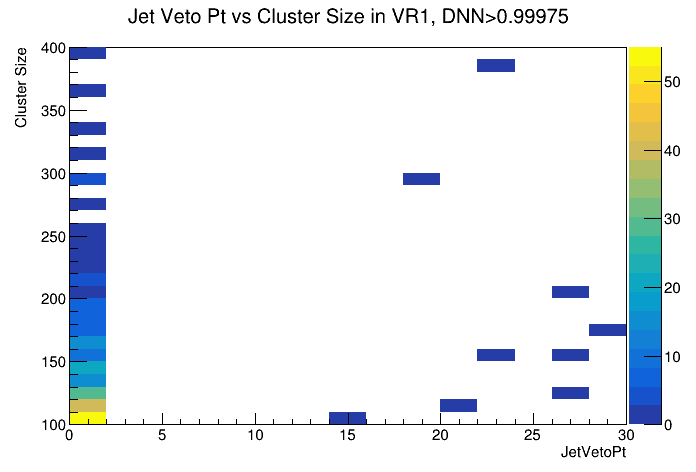

In [75]:
h2d_VR1_DNN = ROOT.TH2D("", "Jet Veto Pt vs Cluster Size in VR1, DNN>0.99975;JetVetoPt;Cluster Size", 15, 0, 30, 30, 100, 400)
for x, y in zip(clusterJetVetoPt_allCutsDNN, clusterSize_allCutsDNN):
    h2d_VR1_DNN.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN.Draw("profcolz")
c.Draw()

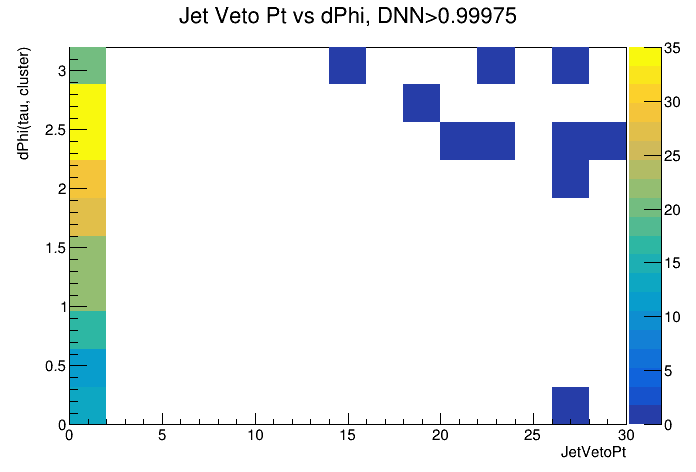

In [77]:
h2d_VR1_DNN = ROOT.TH2D("", "Jet Veto Pt vs dPhi, DNN>0.99975;JetVetoPt;dPhi(tau, cluster)", 15, 0, 30, 10, 0, 3.2)
for x, y in zip(clusterJetVetoPt_allCutsDNN, dPhi_allCutsDNN):
    h2d_VR1_DNN.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN.Draw("profcolz")
c.Draw()

In [ ]:

clusterEta_allCutsDNN_size220 = clusterEta_allCutsDNN[clusterSize_allCutsDNN>220]
clusterPhi_allCutsDNN_size220 = clusterPhi_allCutsDNN[clusterSize_allCutsDNN>220]
dPhiMET_allCutsDNN_size220 = abs(dPhiMET_allCutsDNN[signal_bin_mask])
clusterJetVetoPt_allCutsDNN_size220 = clusterJetVetoPt_allCutsDNN[clusterSize_allCutsDNN>220]
clusterMuonVetoPt_allCutsDNN_size220 = clusterMuonVetoPt_allCutsDNN[clusterSize_allCutsDNN>220]
#clusterZ_allCutsDNN_size220 = clusterZ_allCutsDNN[(clusterSize_allCutsDNN>220)]

In [10]:
#signal_bin_mask = (dPhi_allCutsDNN>2)
signal_bin_mask = (clusterSize_allCutsDNN>220) & (dPhi_allCutsDNN>2.4)
other_bin_mask = ~signal_bin_mask

dEta_signal = abs(clusterDEta_allCutsDNN[signal_bin_mask])
dEta_other = abs(clusterDEta_allCutsDNN[other_bin_mask])

dPhiMET_signal = abs(dPhiMET_allCutsDNN[signal_bin_mask])
dPhiMET_other = abs(dPhiMET_allCutsDNN[other_bin_mask])

clusterJetVeto_signal = clusterJetVetoPt_allCutsDNN[signal_bin_mask]
clusterJetVeto_other = clusterJetVetoPt_allCutsDNN[other_bin_mask]

clusterMuonVeto_signal = clusterMuonVetoPt_allCutsDNN[signal_bin_mask]
clusterMuonVeto_other = clusterMuonVetoPt_allCutsDNN[other_bin_mask]

clusterTime_signal = clusterTime_allCutsDNN[signal_bin_mask]
clusterTime_other = clusterTime_allCutsDNN[other_bin_mask]

clusterTimeSpread_signal = clusterTimeSpread_allCutsDNN[signal_bin_mask]
clusterTimeSpread_other = clusterTimeSpread_allCutsDNN[other_bin_mask]

clusterNStation10_signal = clusterNStation10_allCutsDNN[signal_bin_mask]
clusterNStation10_other = clusterNStation10_allCutsDNN[other_bin_mask]

tauPt_signal = tauPt_allCutsDNN[signal_bin_mask]
tauPt_other = tauPt_allCutsDNN[other_bin_mask]

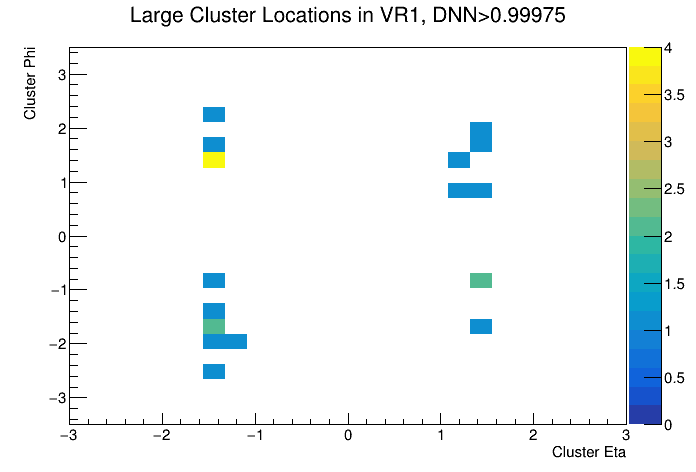

In [94]:
h2d_VR1_DNN_Large = ROOT.TH2D("", "Large Cluster Locations in VR1, DNN>0.99975;Cluster Eta;Cluster Phi", 25, -3, 3, 25, -3.5, 3.5)
for x, y in zip(clusterEta_allCutsDNN_size220, clusterPhi_allCutsDNN_size220):
    h2d_VR1_DNN_Large.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN_Large.Draw("profcolz")
c.Draw()

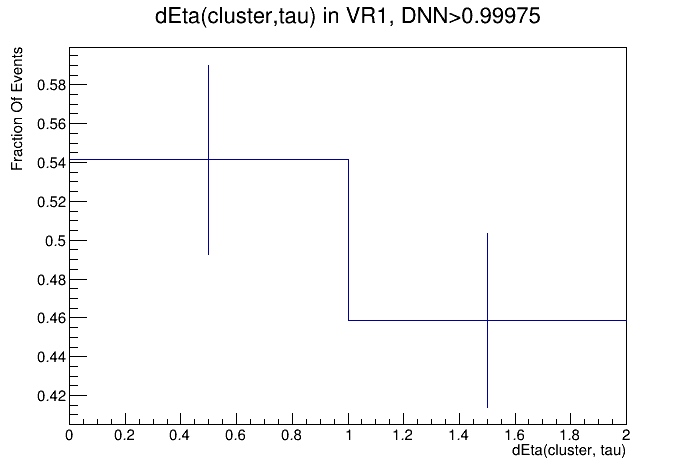

In [14]:
h2d_VR1_DNN_dEta = ROOT.TH1D("", "dEta(cluster,tau) in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 2, 0,2)
for x in dEta_other:
    h2d_VR1_DNN_dEta.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_dEta.Scale(1/h2d_VR1_DNN_dEta.GetSumOfWeights())
h2d_VR1_DNN_dEta.Draw("HIST E")
c.Draw()

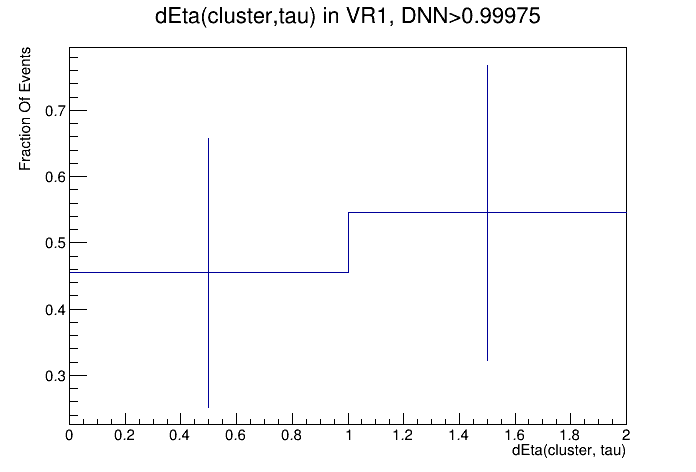

In [15]:
h2d_VR1_DNN_dEta = ROOT.TH1D("", "dEta(cluster,tau) in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 2, 0,2)
for x in dEta_signal:
    h2d_VR1_DNN_dEta.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_dEta.Scale(1/h2d_VR1_DNN_dEta.GetSumOfWeights())
h2d_VR1_DNN_dEta.Draw("HIST E")
c.Draw()

In [16]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 5, 30,200)
for x in MET_allCutsDNN:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

NameError: name 'MET_allCutsDNN' is not defined

In [17]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 5, 30,200)
for x in MET_allCutsDNN_size220:
    h2d_VR1_DNN_MET.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

NameError: name 'MET_allCutsDNN_size220' is not defined

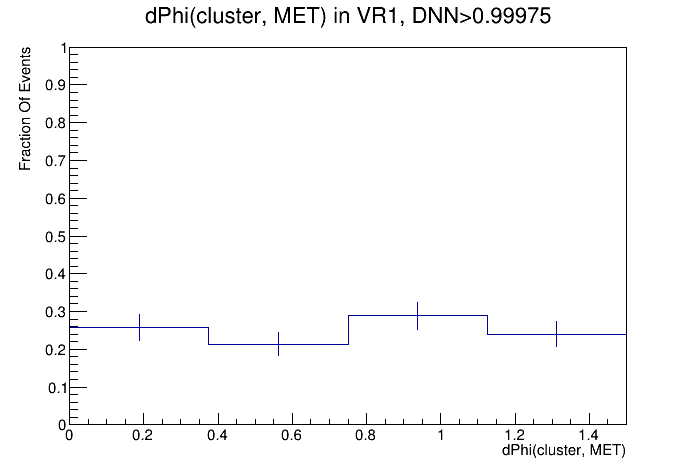

In [20]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "dPhi(cluster, MET) in VR1, DNN>0.99975;dPhi(cluster, MET);Fraction Of Events", 4, 0, 1.5)
for x in dPhiMET_other:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

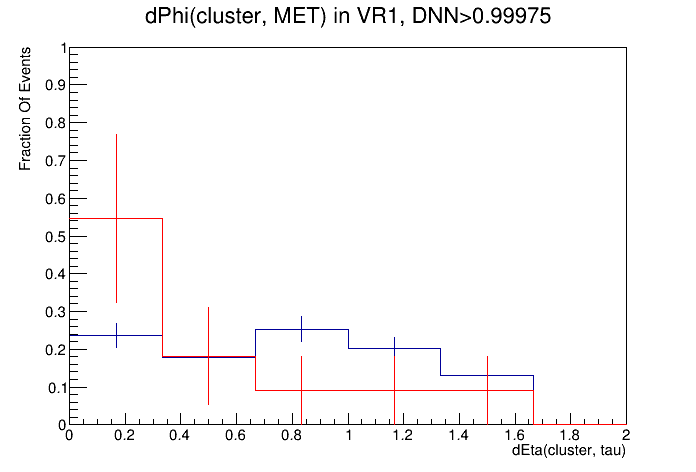

In [73]:
h2d_VR1_DNN_dPhiMET_signal = ROOT.TH1D("", "dPhi(cluster, MET) in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 6, 0, 2)
h2d_VR1_DNN_dPhiMET_other = ROOT.TH1D("", "dPhi(cluster, MET) in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 6, 0, 2)
for x in dPhiMET_signal:
    h2d_VR1_DNN_dPhiMET_signal.Fill(x)
for x in dPhiMET_other:
    h2d_VR1_DNN_dPhiMET_other.Fill(x)
c = ROOT.TCanvas()
h2d_VR1_DNN_dPhiMET_signal.Scale(1/h2d_VR1_DNN_dPhiMET_signal.GetSumOfWeights())
h2d_VR1_DNN_dPhiMET_other.Scale(1/h2d_VR1_DNN_dPhiMET_other.GetSumOfWeights())
h2d_VR1_DNN_dPhiMET_signal.SetLineColor(ROOT.kRed)
h2d_VR1_DNN_dPhiMET_other.GetYaxis().SetRangeUser(0, 1)

h2d_VR1_DNN_dPhiMET_other.Draw("HIST E")
h2d_VR1_DNN_dPhiMET_signal.Draw("HIST E SAME")

c.Draw()

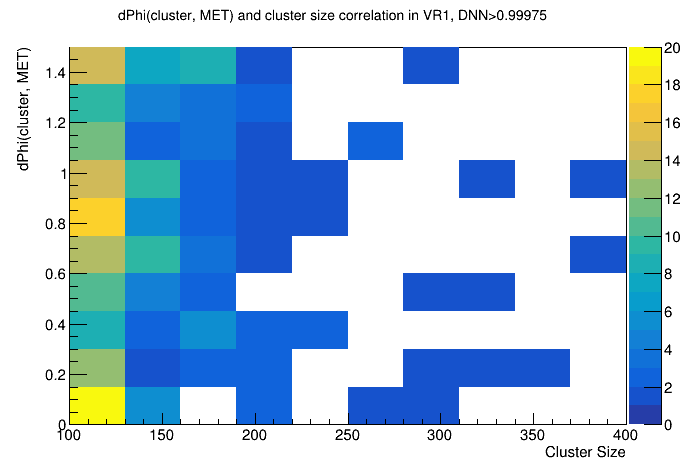

In [80]:
h2d_VR1_DNN_Large = ROOT.TH2D("", "dPhi(cluster, MET) and cluster size correlation in VR1, DNN>0.99975;Cluster Size;dPhi(cluster, MET)", 10, 100, 400, 10, 0, 1.5)
for x, y in zip(clusterSize_allCutsDNN, abs(dPhiMET_allCutsDNN)):
    h2d_VR1_DNN_Large.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN_Large.Draw("profcolz")
c.Draw()

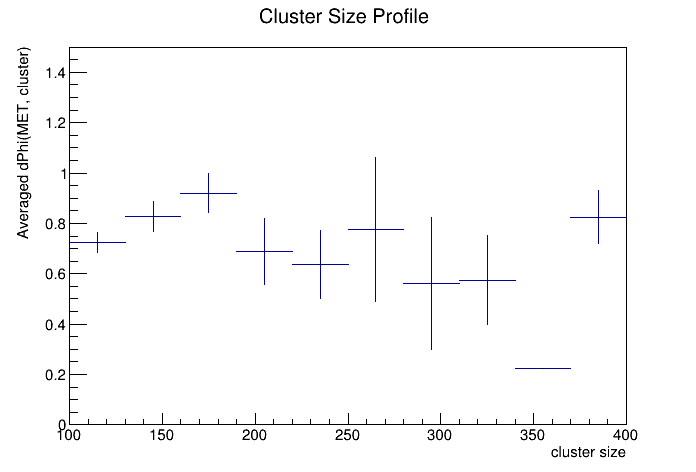

In [83]:
c = ROOT.TCanvas()


h2d_profx = h2d_VR1_DNN_Large.ProfileX("h2d_profx")
#h2d_profx.GetYaxis.SetTitle("dEta(cluster, tau)")
#h2d_profx.SetLineColor(ROOT.kRed)
h2d_profx.SetTitle("Cluster Size Profile;cluster size;Averaged dPhi(MET, cluster)")
h2d_profx.GetYaxis().SetRangeUser(0, 1.5)
h2d_profx.Draw()
c.Draw()
#gStyle.SetOptStat(0)

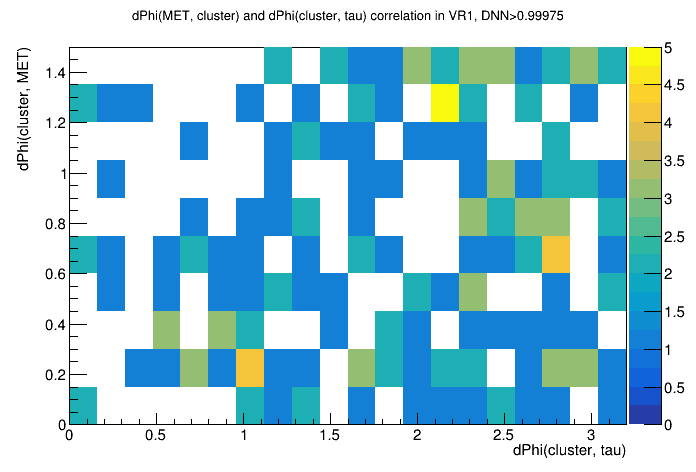

In [86]:
h2d_VR1_DNN_Large = ROOT.TH2D("", "dPhi(MET, cluster) and dPhi(cluster, tau) correlation in VR1, DNN>0.99975;dPhi(cluster, tau);dPhi(cluster, MET)", 20, 0, 3.2, 10, 0, 1.5)
for x, y in zip(dPhi_allCutsDNN, abs(clusterDEta_allCutsDNN)):
    h2d_VR1_DNN_Large.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN_Large.Draw("profcolz")
c.Draw()

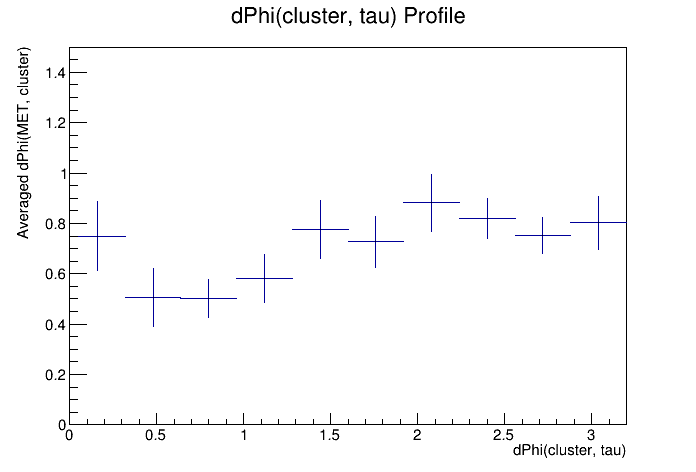

In [89]:
c = ROOT.TCanvas()



h2d_profx = h2d_VR1_DNN_Large.ProfileX("h2d_profx")
#h2d_profx.SetLineColor(ROOT.kRed)
h2d_profx.SetTitle("dPhi(cluster, tau) Profile;dPhi(cluster, tau);Averaged dPhi(MET, cluster)")

h2d_profx.Rebin(2)
h2d_profx.Draw()
c.Draw()
#gStyle.SetOptStat(0)

In [ ]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 4, 0, 1.5)


c = ROOT.TCanvas()

h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

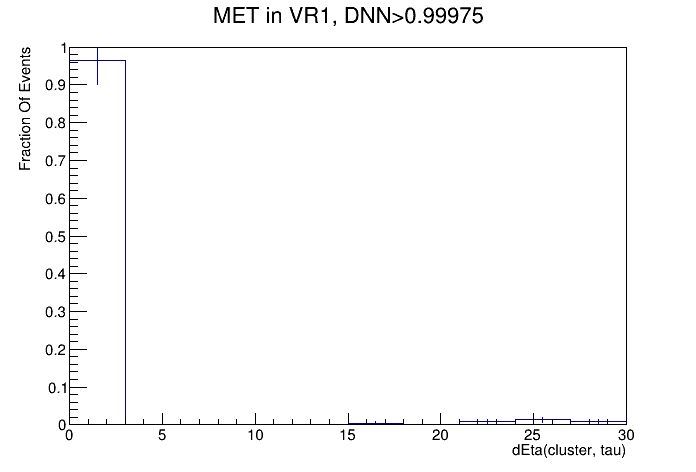

In [65]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 10, 0, 30)
for x in clusterJetVeto_other:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

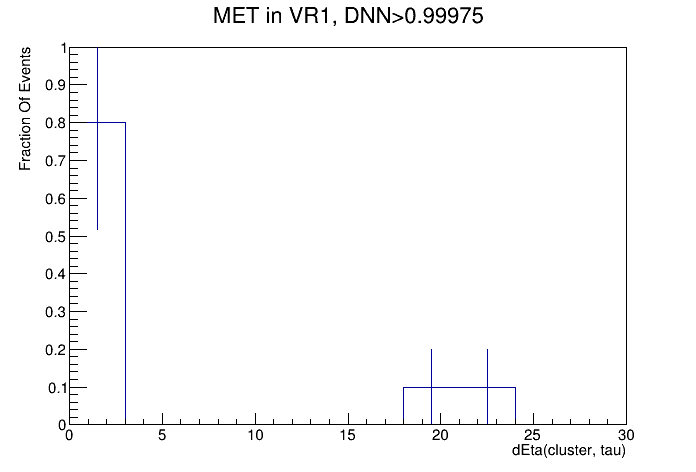

In [66]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 10, 0, 30)
for x in clusterJetVeto_signal:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

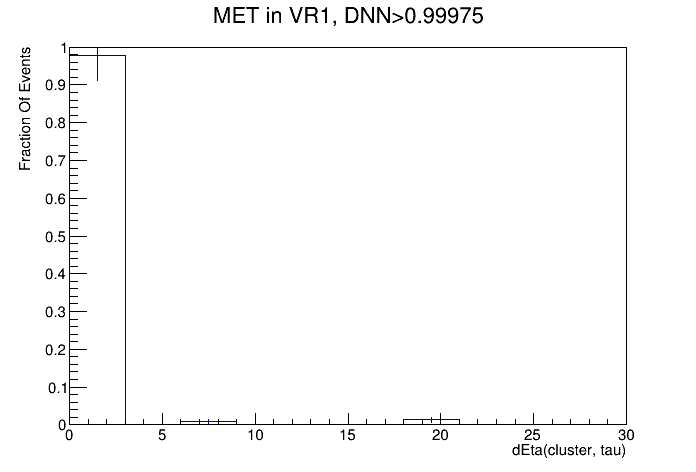

In [67]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 10, 0, 30)
for x in clusterMuonVeto_other:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

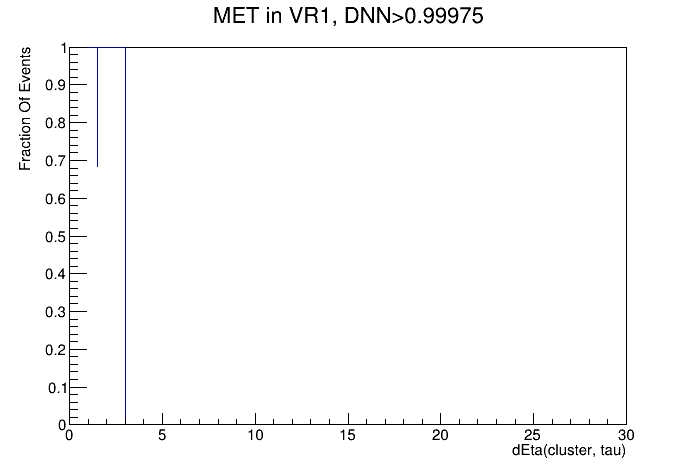

In [68]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 10, 0, 30)
for x in clusterMuonVeto_signal:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

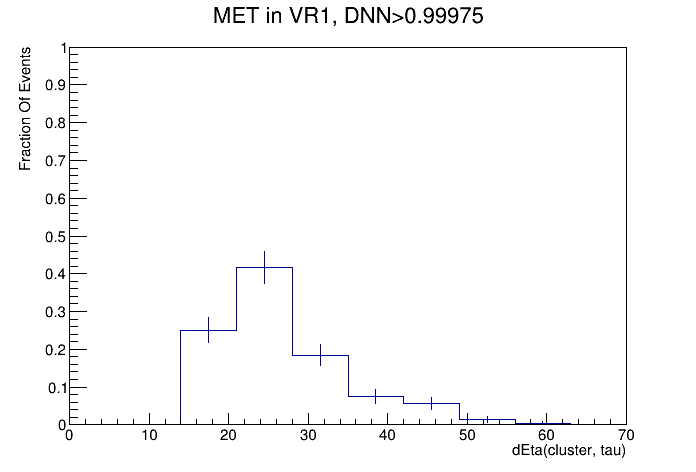

In [94]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 10, 0, 70)
for x in tauPt_other:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

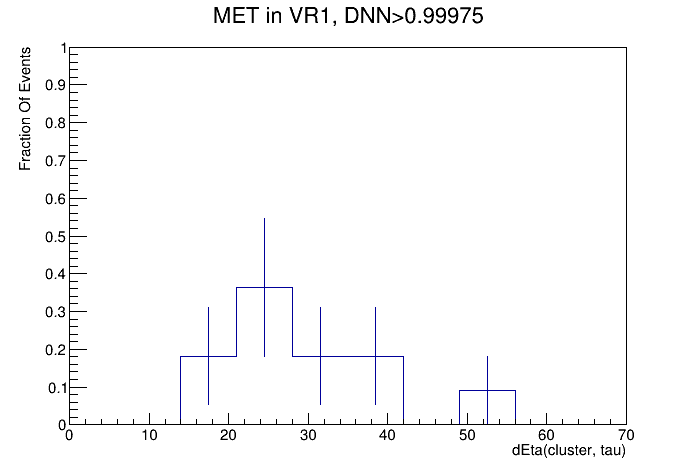

In [95]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 10, 0, 70)
for x in tauPt_signal:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

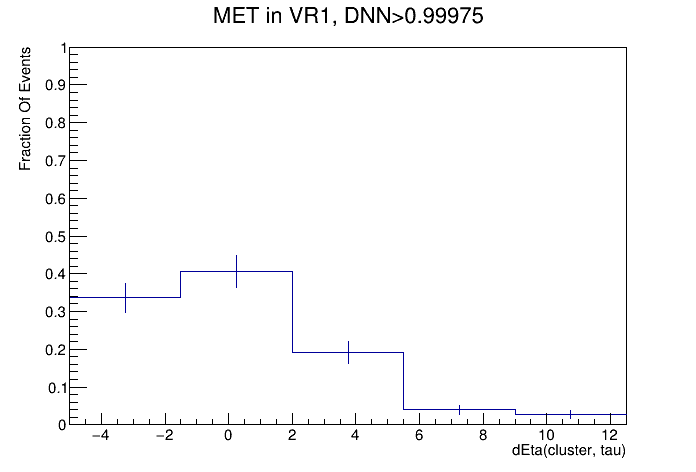

In [96]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 5, -5, 12.5)
for x in clusterTime_other:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

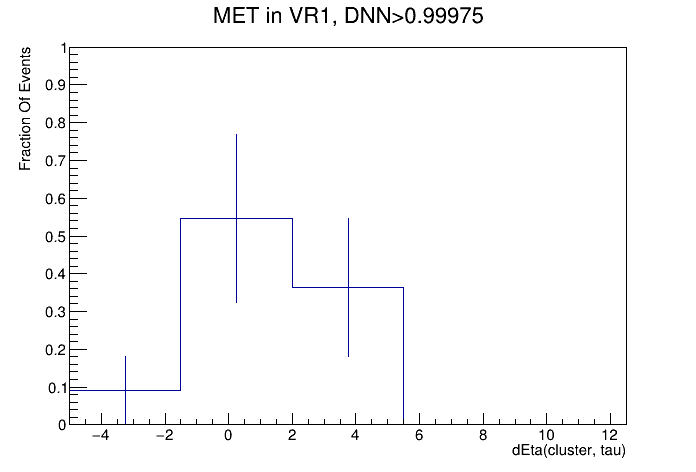

In [99]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 5, -5, 12.5)
for x in clusterTime_signal:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

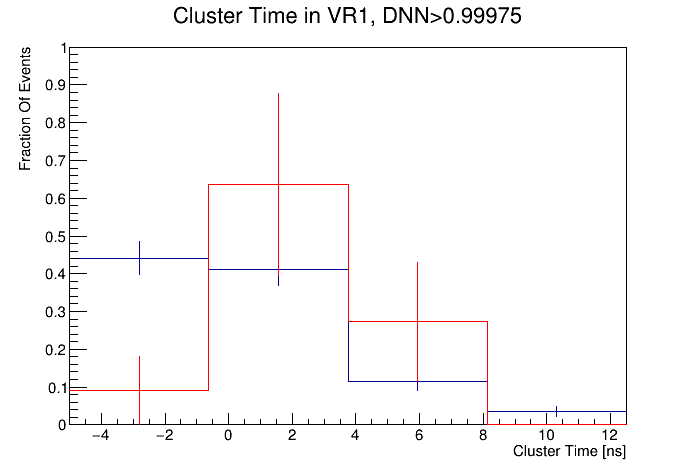

In [101]:
h2d_VR1_DNN_Time_other = ROOT.TH1D("", "Cluster Time in VR1, DNN>0.99975;Cluster Time [ns];Fraction Of Events", 4, -5, 12.5)
for x in clusterTime_other:
    h2d_VR1_DNN_Time_other.Fill(x)
h2d_VR1_DNN_Time_signal = ROOT.TH1D("", "Cluster Time in VR1, DNN>0.99975;Cluster Time [ns];Fraction Of Events", 4, -5, 12.5)
for x in clusterTime_signal:
    h2d_VR1_DNN_Time_signal.Fill(x)
c = ROOT.TCanvas()
h2d_VR1_DNN_Time_signal.Scale(1/h2d_VR1_DNN_Time_signal.GetSumOfWeights())
h2d_VR1_DNN_Time_other.Scale(1/h2d_VR1_DNN_Time_other.GetSumOfWeights())
h2d_VR1_DNN_Time_signal.SetLineColor(ROOT.kRed)
h2d_VR1_DNN_Time_other.GetYaxis().SetRangeUser(0, 1)

h2d_VR1_DNN_Time_other.Draw("HIST E")
h2d_VR1_DNN_Time_signal.Draw("HIST E SAME")

c.Draw()

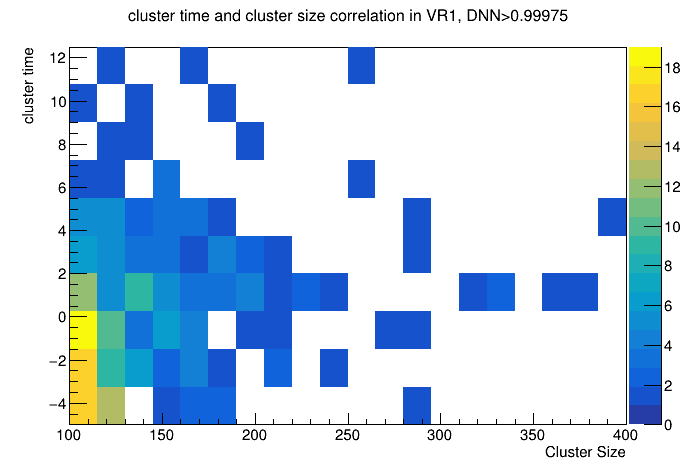

In [109]:
h2d_VR1_DNN_Large = ROOT.TH2D("", "cluster time and cluster size correlation in VR1, DNN>0.99975;Cluster Size;cluster time", 20, 100, 400, 10, -5, 12.5)
for x, y in zip(clusterSize_allCutsDNN, clusterTime_allCutsDNN):
    h2d_VR1_DNN_Large.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN_Large.Draw("profcolz")
c.Draw()

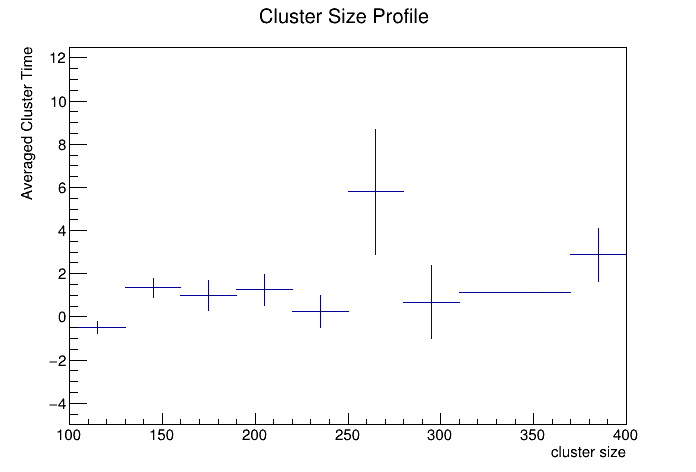

In [112]:
c = ROOT.TCanvas()


h2d_profx = h2d_VR1_DNN_Large.ProfileX("h2d_profx")
#h2d_profx.GetYaxis.SetTitle("dEta(cluster, tau)")
#h2d_profx.SetLineColor(ROOT.kRed)
h2d_profx.SetTitle("Cluster Size Profile;cluster size;Averaged Cluster Time")
h2d_profx.GetYaxis().SetRangeUser(-5, 12.5)
h2d_profx.Rebin(2)
h2d_profx.Draw()
c.Draw()
#gStyle.SetOptStat(0)

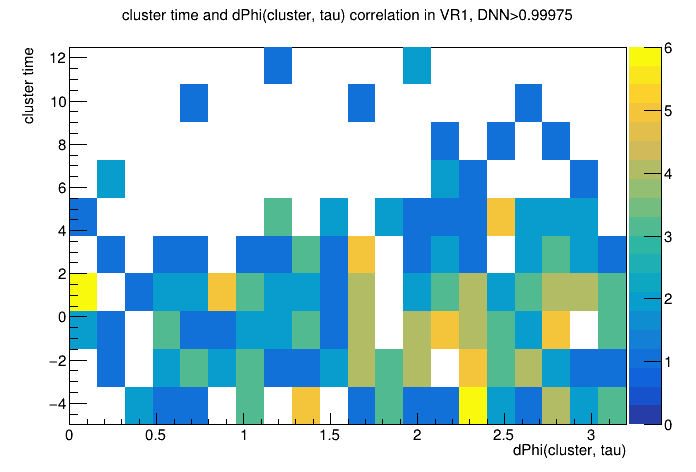

In [113]:
h2d_VR1_DNN_Large = ROOT.TH2D("", "cluster time and dPhi(cluster, tau) correlation in VR1, DNN>0.99975;dPhi(cluster, tau);cluster time", 20, 0, 3.2, 10, -5, 12.5)
for x, y in zip(dPhi_allCutsDNN, clusterTime_allCutsDNN):
    h2d_VR1_DNN_Large.Fill(x,y)

c = ROOT.TCanvas()
h2d_VR1_DNN_Large.Draw("profcolz")
c.Draw()

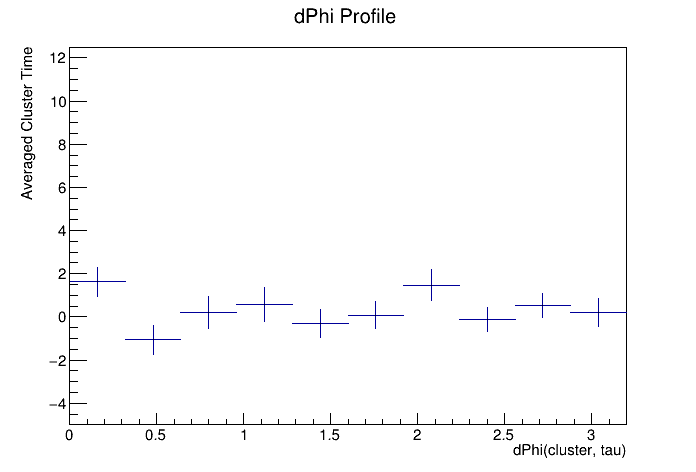

In [116]:
c = ROOT.TCanvas()


h2d_profx = h2d_VR1_DNN_Large.ProfileX("h2d_profx")
#h2d_profx.GetYaxis.SetTitle("dEta(cluster, tau)")
#h2d_profx.SetLineColor(ROOT.kRed)
h2d_profx.SetTitle("dPhi Profile;dPhi(cluster, tau);Averaged Cluster Time")
h2d_profx.GetYaxis().SetRangeUser(-5, 12.5)
h2d_profx.Rebin(2)
h2d_profx.Draw()
c.Draw()
#gStyle.SetOptStat(0)

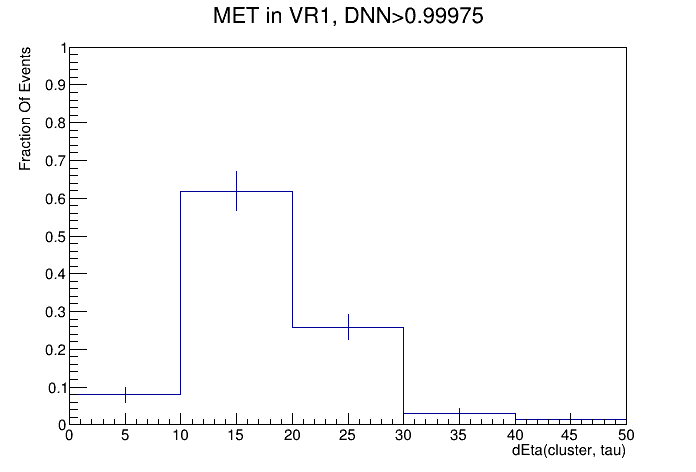

In [102]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 5, 0, 50)
for x in clusterTimeSpread_other:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

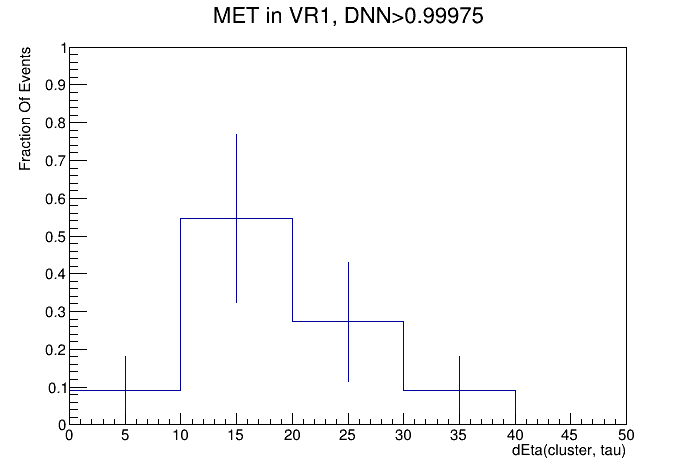

In [103]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 5, 0, 50)
for x in clusterTimeSpread_signal:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

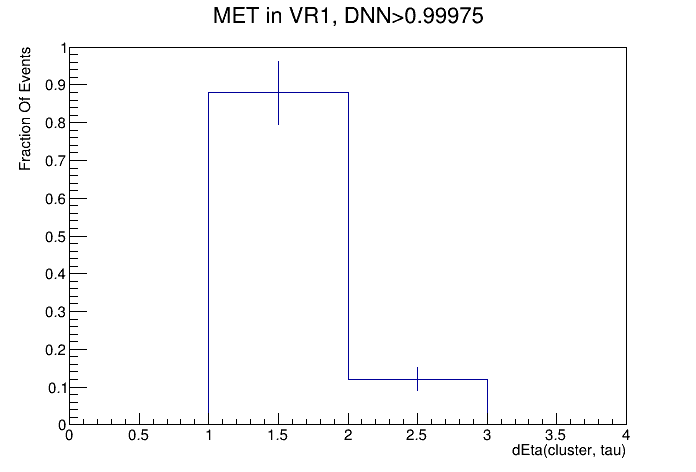

In [19]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 4, 0, 4)
for x in clusterNStation10_other:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

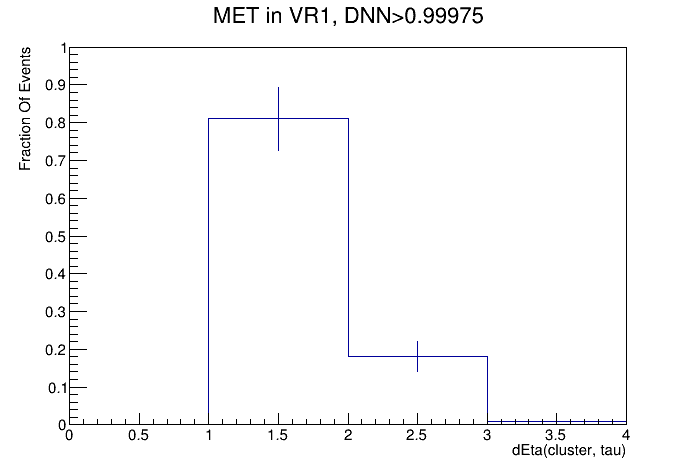

In [20]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 4, 0, 4)
for x in clusterNStation10_signal:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.GetYaxis().SetRangeUser(0, 1)
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

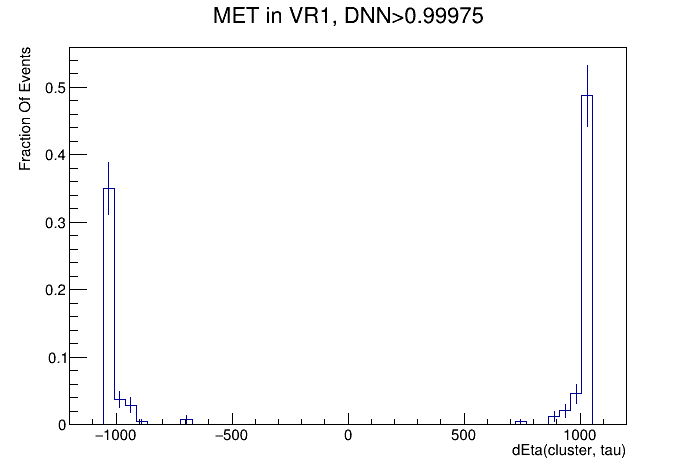

In [149]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 50, -1200, 1200)
for x in clusterZ_allCutsDNN:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

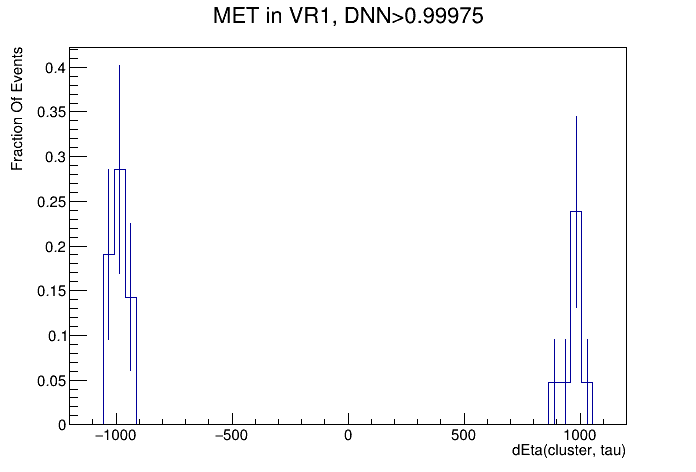

In [150]:
h2d_VR1_DNN_MET = ROOT.TH1D("", "MET in VR1, DNN>0.99975;dEta(cluster, tau);Fraction Of Events", 50, -1200, 1200)
for x in clusterZ_allCutsDNN_size220:
    h2d_VR1_DNN_MET.Fill(x)

c = ROOT.TCanvas()
h2d_VR1_DNN_MET.Scale(1/h2d_VR1_DNN_MET.GetSumOfWeights())
h2d_VR1_DNN_MET.Draw("HIST E")
c.Draw()

#### Get lists of run num, lumi sec, and evt num for "normal" events in the VR to compare to the hypothesized extra bkg at large cluster size, high dPhi(cluster, tau). In particular, will target those with small dPhi(MET, cluster), where a discrepancy was observed

In [42]:
#load DNN data
clusterEta_allCutsDNN, clusterPhi_allCutsDNN, runNum_allCutsDNN, lumiSec_allCutsDNN, evtNum_allCutsDNN, dPhiMET_allCutsDNN, nClusters_allCutsDNN = ABCD_FirstStudy_Helper.return_clusterSize_dPhiClusterTau_allSelectionsDNN(
            data_events, passID = 'tauIsLoose', failID = 'tauIsMedium', blind=False, 
            DNN_cut=0.99975, hotspotCheck=True, additional_branches=["runNum", "lumiSec", "evtNum", 'cscRechitClusterPuppiMet_dPhi', "nCscRechitClusters"]
            )

/uscms/home/amalbert/.local/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36791 instead
  warnings.warn(
/uscms/home/amalbert/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-083

In [43]:


# print(runNum_allCutsDNN)
# print(nClusters_allCutsDNN)
runNum_allCutsDNN = np.repeat(runNum_allCutsDNN, nClusters_allCutsDNN)
lumiSec_allCutsDNN = np.repeat(lumiSec_allCutsDNN, nClusters_allCutsDNN)
evtNum_allCutsDNN = np.repeat(evtNum_allCutsDNN, nClusters_allCutsDNN)


In [19]:
size_thresh = 220
dPhi_thresh = 2.6
dPhiMET_thresh = 0.5

SR_mask = ak.flatten((clusterSize_allCutsDNN>=size_thresh) & (dPhi_allCutsDNN>=dPhi_thresh) & (abs(dPhiMET_allCutsDNN)<=dPhiMET_thresh))

size_thres_control = 160
dPhi_thresh_control = 2
dPhi_MET_control = 0.5
control_mask = ak.flatten((clusterSize_allCutsDNN<=size_thresh) & (dPhi_allCutsDNN<=dPhi_thresh) & (abs(dPhiMET_allCutsDNN)>dPhiMET_thresh))

In [44]:
runNum_allCutsDNN

<Array [379058, 380385, 380481, ..., 386704, 386704] type='281 * uint32'>

In [45]:
SR_runNums = runNum_allCutsDNN[SR_mask]
SR_lumiSecs = lumiSec_allCutsDNN[SR_mask]
SR_evtNums = evtNum_allCutsDNN[SR_mask]

control_runNums = runNum_allCutsDNN[control_mask]
control_lumiSecs = lumiSec_allCutsDNN[control_mask]
control_evtNums = evtNum_allCutsDNN[control_mask]

In [46]:
SR_runNums

<Array [382960, 381164, 381191, 382343, 383323, 385620] type='6 * uint32'>

In [47]:
SR_lumiSecs

<Array [352, 524, 985, 411, 312, 152] type='6 * uint32'>

In [48]:
SR_evtNums

<Array [730849755, 1099623750, ..., 684472697, 344233245] type='6 * uint32'>